# MA0218 Project
# Airbnb dataset
Group 10

Low Gin Teck

Wong Jun Kiat

Yap Zhen Yan

Main problem: Can we predict airbnb prices from current listing?

Sub Prob 1: Do the price change depending on the time of year?

Sub Prob 2: Which neighbourhood is the most costly and cheapest to stay?


In [193]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
import re
import warnings
warnings.filterwarnings('ignore')
!pip install folium
import folium

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import recall_score
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

!pip install holidays
from datetime import date
import datetime
import calendar
import holidays

In [194]:
airbnblistingdata_a = pd.read_csv('listings.csv')
airbnbvariables_a = airbnblistingdata_a[['price','accommodates','number_of_reviews','reviews_per_month','security_deposit','cleaning_fee','extra_people']]
airbnbvariables_a = airbnbvariables_a.dropna()
listings_zy = pd.read_csv("listings.csv")
calendar_jk = pd.read_csv('calendar.csv')

# Main problem: Price prediction through regression models

### Cleaning of data

In [195]:
print (airbnbvariables_a.shape)
print (airbnbvariables_a.head())

(1465, 7)
     price  accommodates  number_of_reviews  reviews_per_month  \
1  $150.00             4                 43               1.48   
2  $975.00            11                 20               1.15   
4  $450.00             6                 38               0.89   
7   $60.00             2                173               4.73   
9  $150.00             4                 32               1.55   

  security_deposit cleaning_fee extra_people  
1          $100.00       $40.00        $0.00  
2        $1,000.00      $300.00       $25.00  
4          $700.00      $125.00       $15.00  
7          $150.00       $25.00        $0.00  
9          $100.00       $40.00        $0.00  


In [196]:
def dollarsign(money):
    if isinstance(money, str):
        return(money.replace('$', ''))
    return(money)
for var in airbnbvariables_a:
    airbnbvariables_a[var] = airbnbvariables_a[var].apply(dollarsign)

In [197]:
def commasign(comma):
    if isinstance(comma, str):
        return(comma.replace(',', ''))
    return(comma)
for var in airbnbvariables_a:
    airbnbvariables_a[var] = airbnbvariables_a[var].apply(commasign)

In [198]:
def decimal(dp):
    if isinstance(dp, str):
        return(dp.replace('.00', ''))
    return(dp)
for var in airbnbvariables_a:
    airbnbvariables_a[var] = airbnbvariables_a[var].apply(decimal)

In [199]:
airbnbvariables_a.dtypes

price                 object
accommodates           int64
number_of_reviews      int64
reviews_per_month    float64
security_deposit      object
cleaning_fee          object
extra_people          object
dtype: object

In [200]:
airbnbvariables_a= airbnbvariables_a.astype(int)

In [201]:
airbnbvariables_a

,price,accommodates,number_of_reviews,reviews_per_month,security_deposit,cleaning_fee,extra_people
1,150,4,43,1,100,40,0
2,975,11,20,1,1000,300,25
4,450,6,38,0,700,125,15
7,60,2,173,4,150,25,0
9,150,4,32,1,100,40,0
...,...,...,...,...,...,...,...
3804,125,2,12,2,150,45,0
3805,100,6,10,3,200,89,20
3808,175,6,29,1,500,95,30
3810,154,5,5,1,150,85,50


In [202]:
airbnbvariables_a.describe()

,price,accommodates,number_of_reviews,reviews_per_month,security_deposit,cleaning_fee,extra_people
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,145.057338,3.891468,24.054608,1.490785,284.948805,67.942662,14.917406
std,102.286433,2.262751,30.699069,1.685304,269.705379,48.920179,19.469414
min,28.000000,1.000000,1.000000,0.000000,95.000000,5.000000,0.000000
25%,85.000000,2.000000,5.000000,0.000000,150.000000,35.000000,0.000000
50%,116.000000,4.000000,13.000000,1.000000,250.000000,60.000000,12.000000
75%,169.000000,5.000000,31.000000,2.000000,300.000000,90.000000,25.000000
max,999.000000,16.000000,278.000000,11.000000,5000.000000,300.000000,300.000000


### Data Analysis

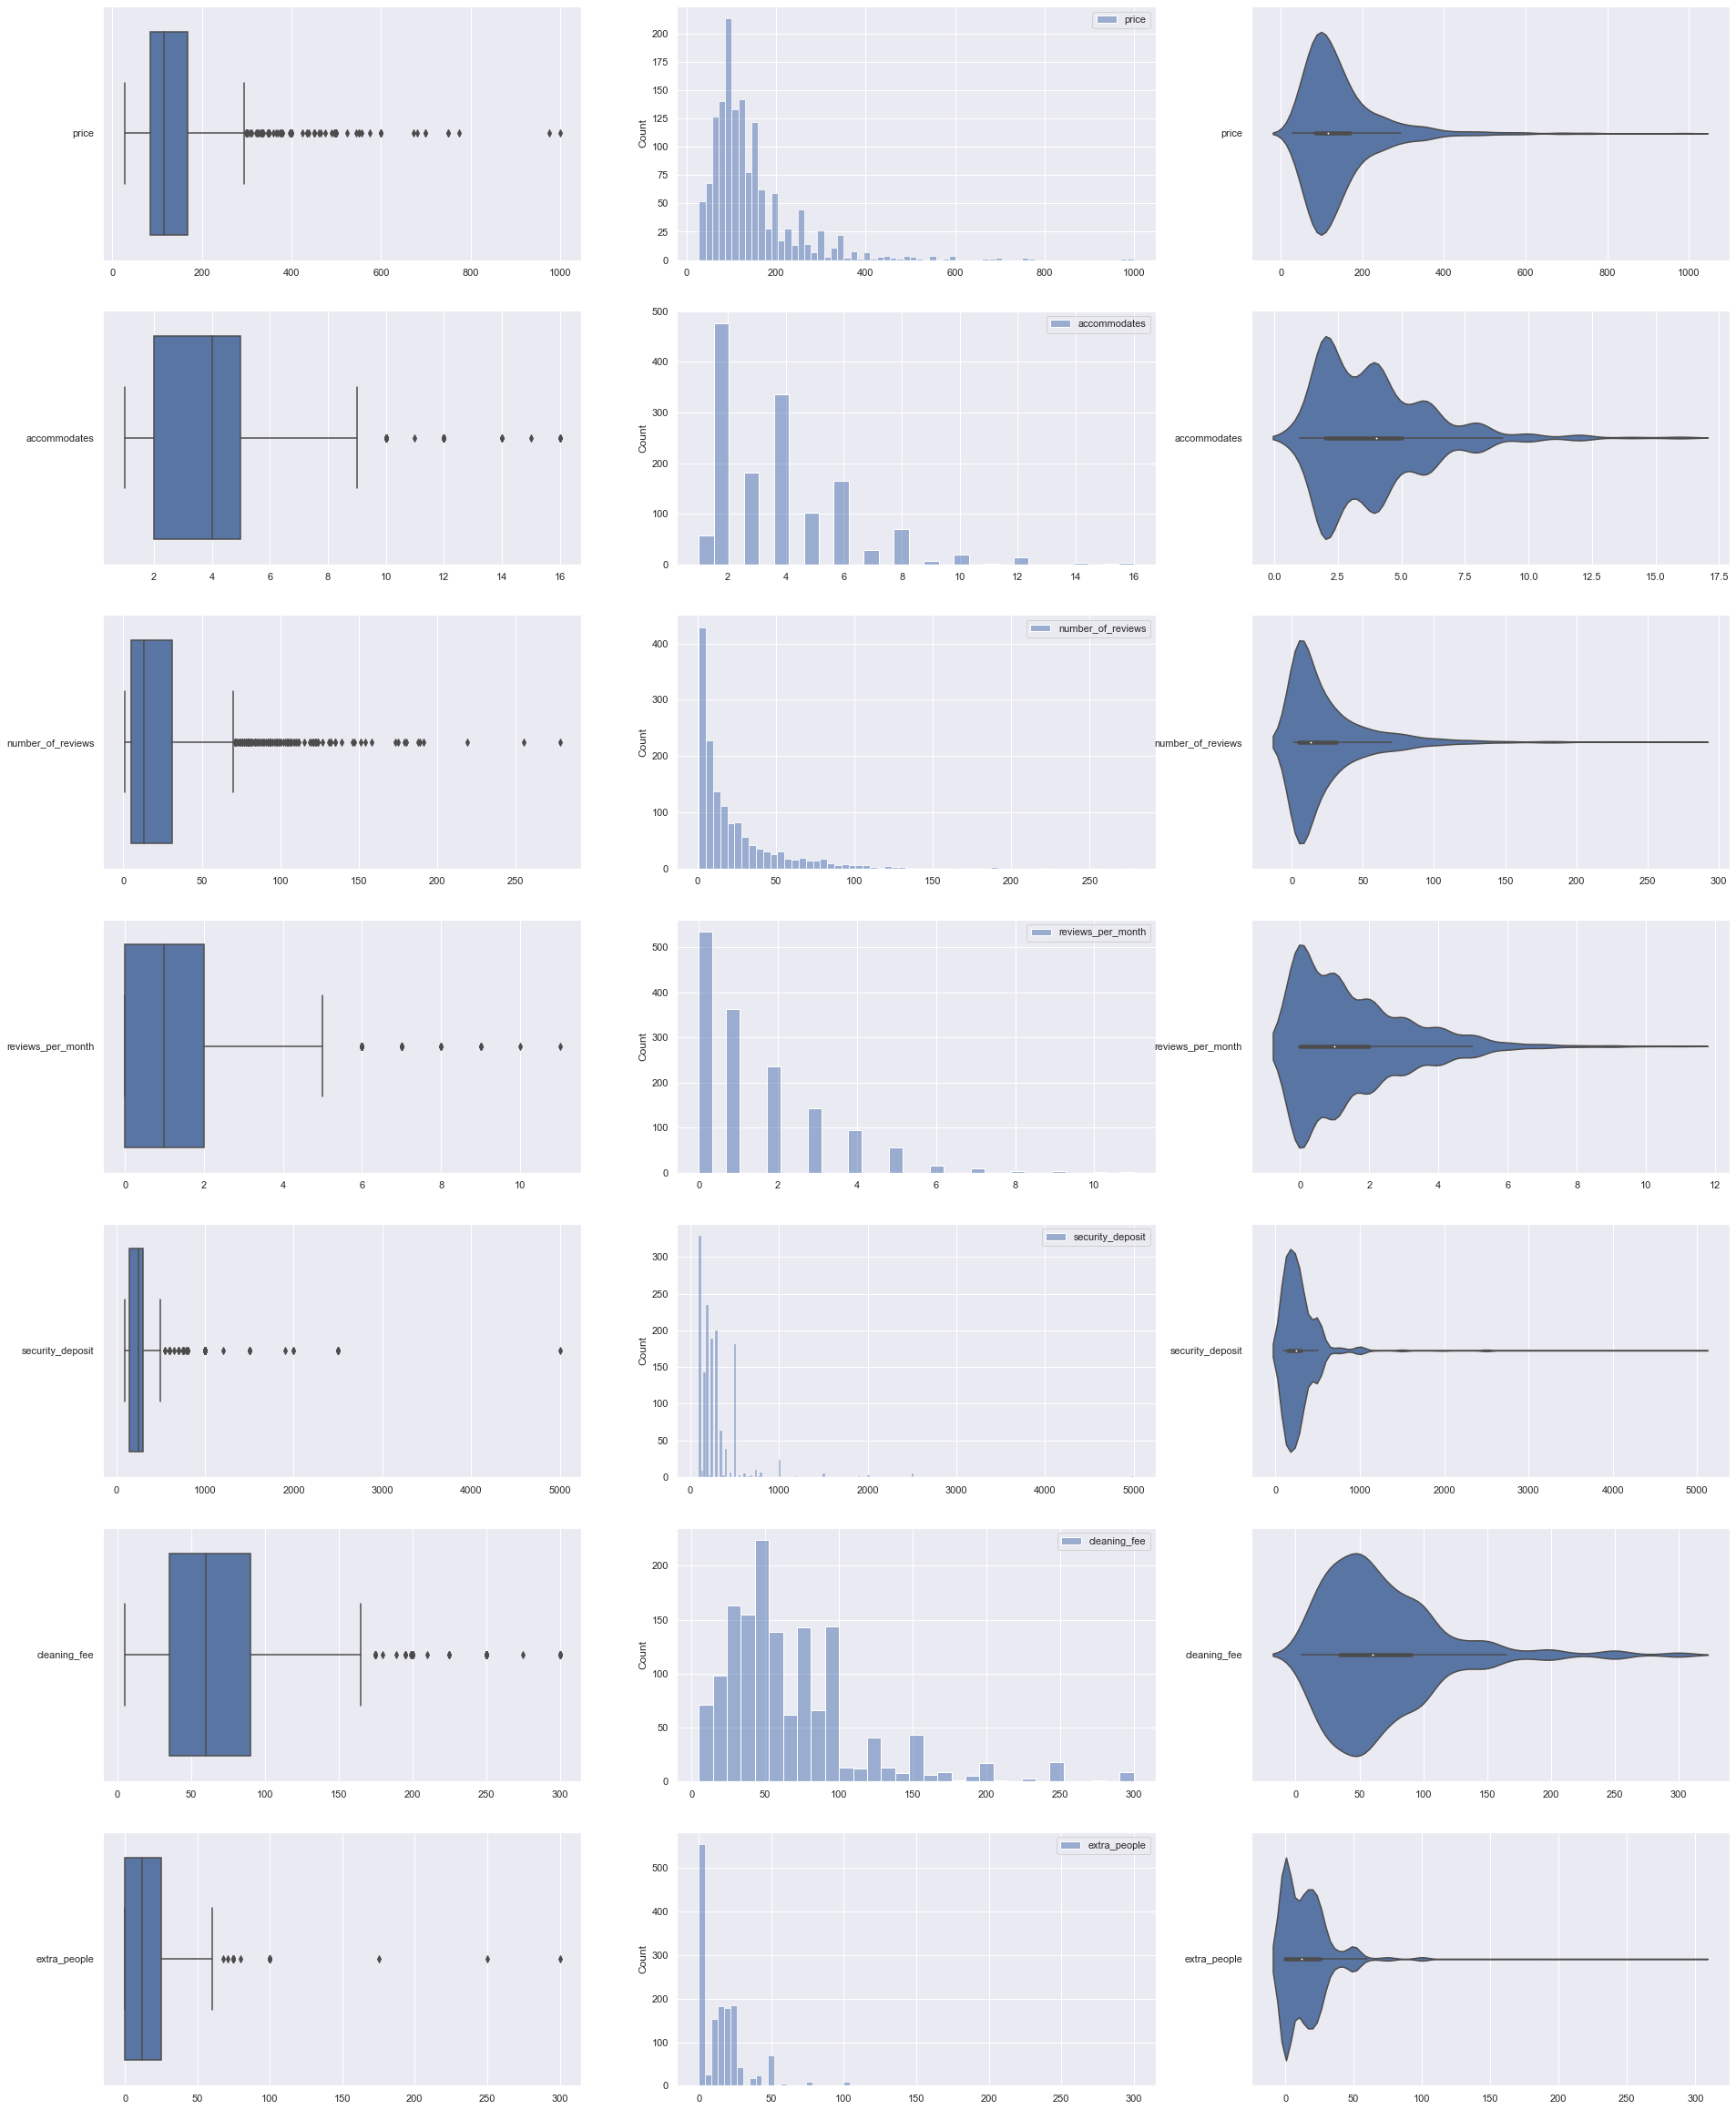

In [203]:
f, axes = plt.subplots(7, 3, figsize=(32, 42))

count = 0

for var in airbnbvariables_a:
    sb.boxplot(data = airbnbvariables_a[[var]], orient = "h", ax = axes[count,0])
    sb.histplot(data = airbnbvariables_a[[var]], ax = axes[count,1])
    sb.violinplot(data = airbnbvariables_a[[var]], orient = "h", ax = axes[count,2])
    count += 1

Looking at the graphs and plots, price represents a "standard distribution" the most as the histogram chart most resembles a bell shape curve as compared to the other variables.

In [204]:
q1_a = airbnbvariables_a.quantile(0.25)
q3_a = airbnbvariables_a.quantile(0.75)

rule_a = ((airbnbvariables_a<q1_a-(q3_a-q1_a)*1.5)) | ((airbnbvariables_a>q3_a+(q3_a-q1_a)*1.5))

print('Outliers')
rule_a.sum()

Outliers


price                111
accommodates          42
number_of_reviews    121
reviews_per_month     37
security_deposit      67
cleaning_fee          64
extra_people          24
dtype: int64

Number of reviews has the most amount of outliers with a total of 121 outliers. Coming in at a close 2nd is price with a total of 111 outliers.

<AxesSubplot:>

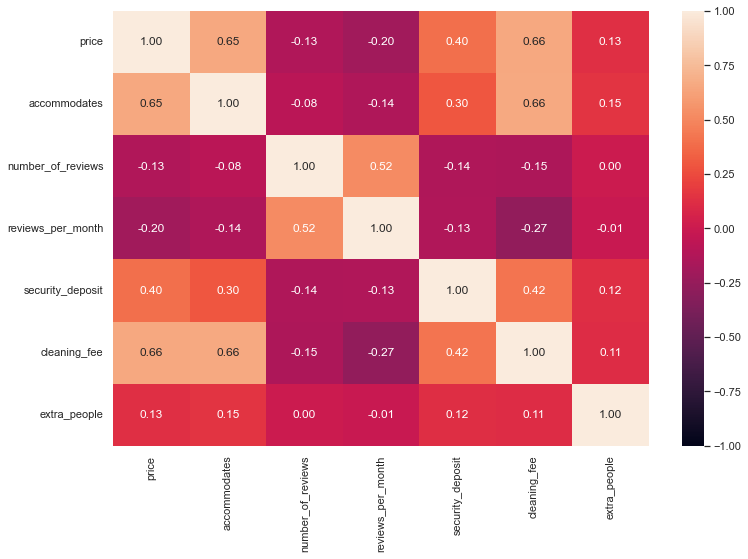

In [205]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(airbnbvariables_a.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

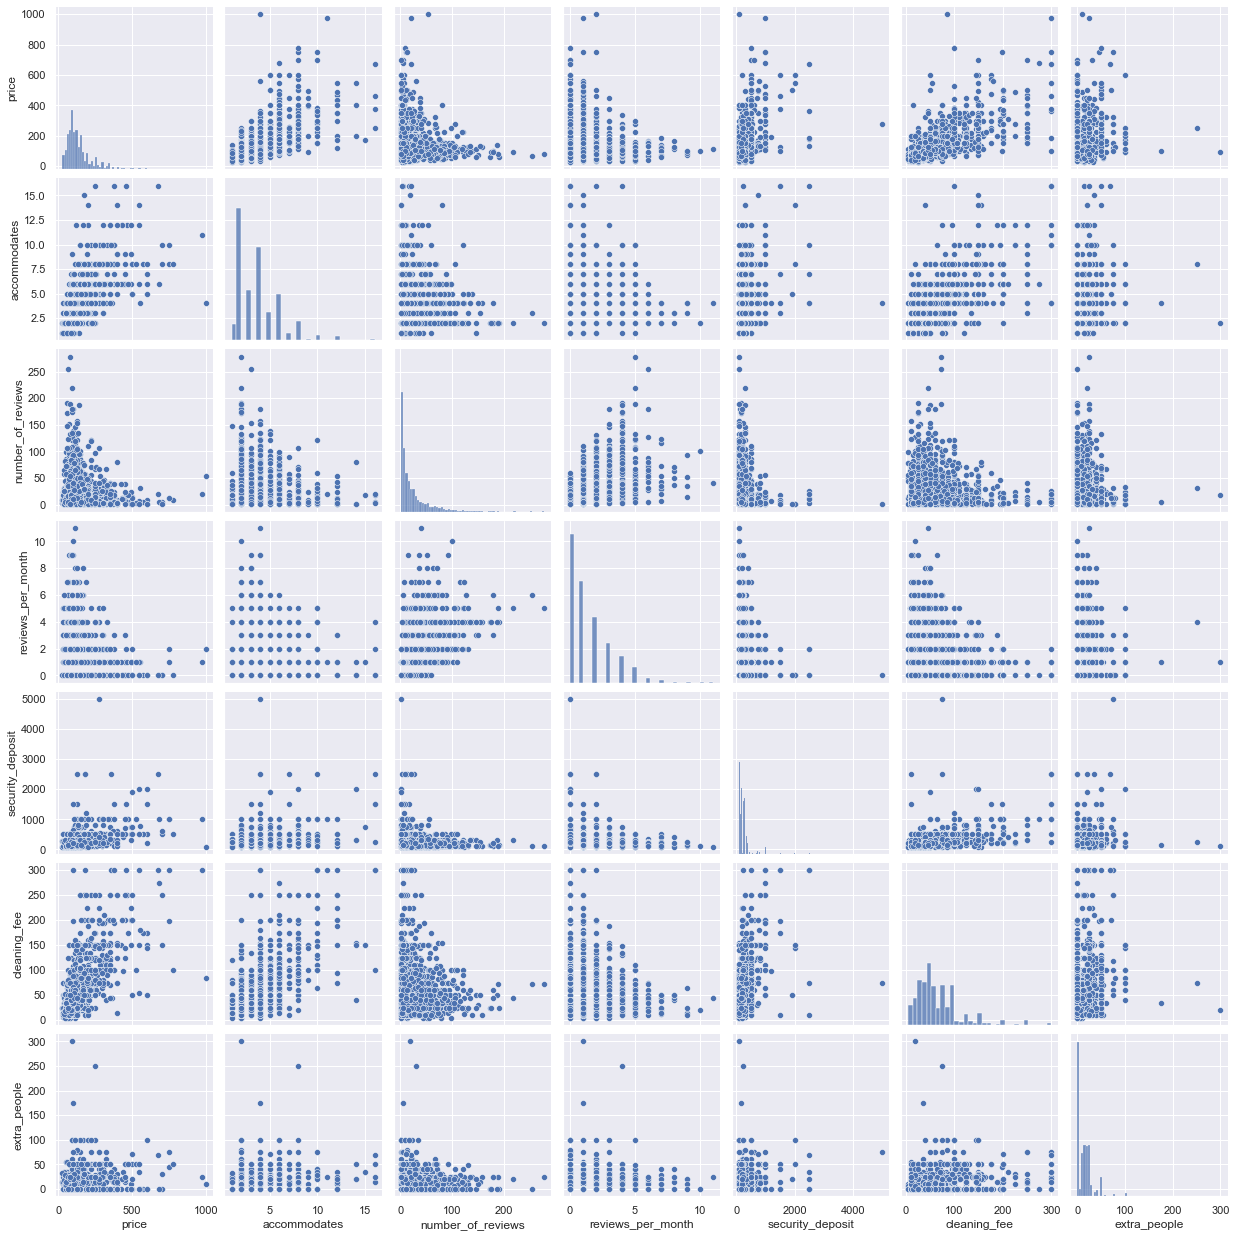

In [206]:
sb.pairplot(data = airbnbvariables_a)

From the Correlation plot above, 'accommodates', 'cleaning fee' and 'sercurity deposit' can be explored further to predict the price.

### Regression Models

#### Linear Regression

In [207]:
y_a = pd.DataFrame(airbnbvariables_a[["price"]])
X_a = pd.DataFrame(airbnbvariables_a[["accommodates", "cleaning_fee", "security_deposit"]])

X_a_train = pd.DataFrame(X_a[:1172])
X_a_test = pd.DataFrame(X_a[-293:])
y_a_train = pd.DataFrame(y_a[:1172])
y_a_test = pd.DataFrame(y_a[-293:])

linreg_a = LinearRegression()
linreg_a.fit(X_a_train, y_a_train) 

y_a_train_pred = linreg_a.predict(X_a_train)
y_a_test_pred = linreg_a.predict(X_a_test)

print('X_a_train shape:', X_a_train.shape)
print('X_a_test shape:', X_a_test.shape)
print('y_a_train shape:', y_a_train.shape)
print('y_a_test shape:', y_a_test.shape)

X_a_train shape: (1172, 3)
X_a_test shape: (293, 3)
y_a_train shape: (1172, 1)
y_a_test shape: (293, 1)


Linear regression
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.538759295434873
Mean Squared Error (MSE) 	: 5122.154935367308

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.496913244204486
Mean Squared Error (MSE) 	: 3952.286988073886



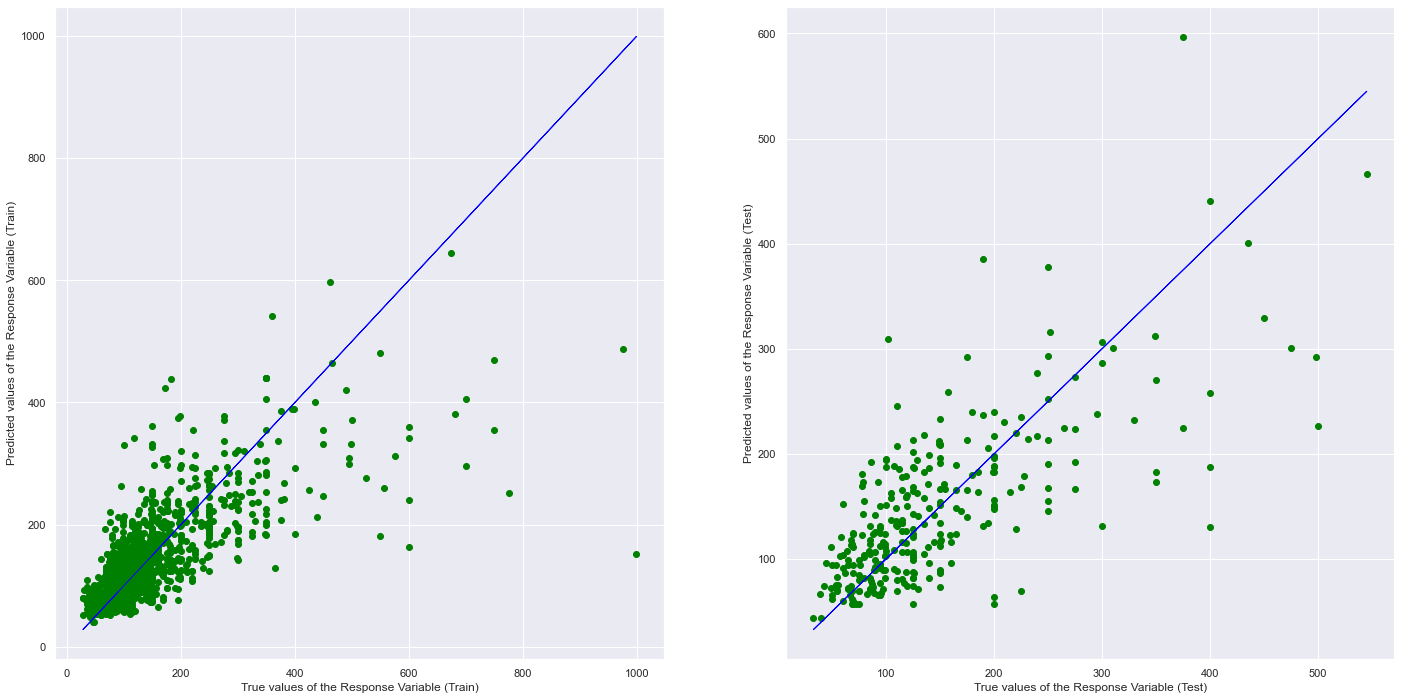

In [208]:
print("Linear regression")

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_a.score(X_a_train, y_a_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_a_train, y_a_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_a.score(X_a_test, y_a_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_a_test, y_a_test_pred))
print()

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_a_train, y_a_train_pred, color = "green")
axes[0].plot(y_a_train, y_a_train, color = "blue", linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_a_test, y_a_test_pred, color = "green")
axes[1].plot(y_a_test, y_a_test, color = "blue", linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

After splitting up the data in to test and train datasets, the train dataset is used to fit in the regression model to help better predict the price of airbnb. After testing out the model, 'security deposit' and 'accommodates' is decent in predicting price but there maybe other models out there which can help predict price better. 

#### Improving the model

#### Lasso regression

Lasso regression is a type of linear regression that uses shrinkage in its model. Shrinkage is the reduction of parameters within the linear regression model.

Lasso regression
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5351352145171309
Mean Squared Error (MSE) 	: 5162.400958268705

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4865563587259917
Mean Squared Error (MSE) 	: 4033.65145104588



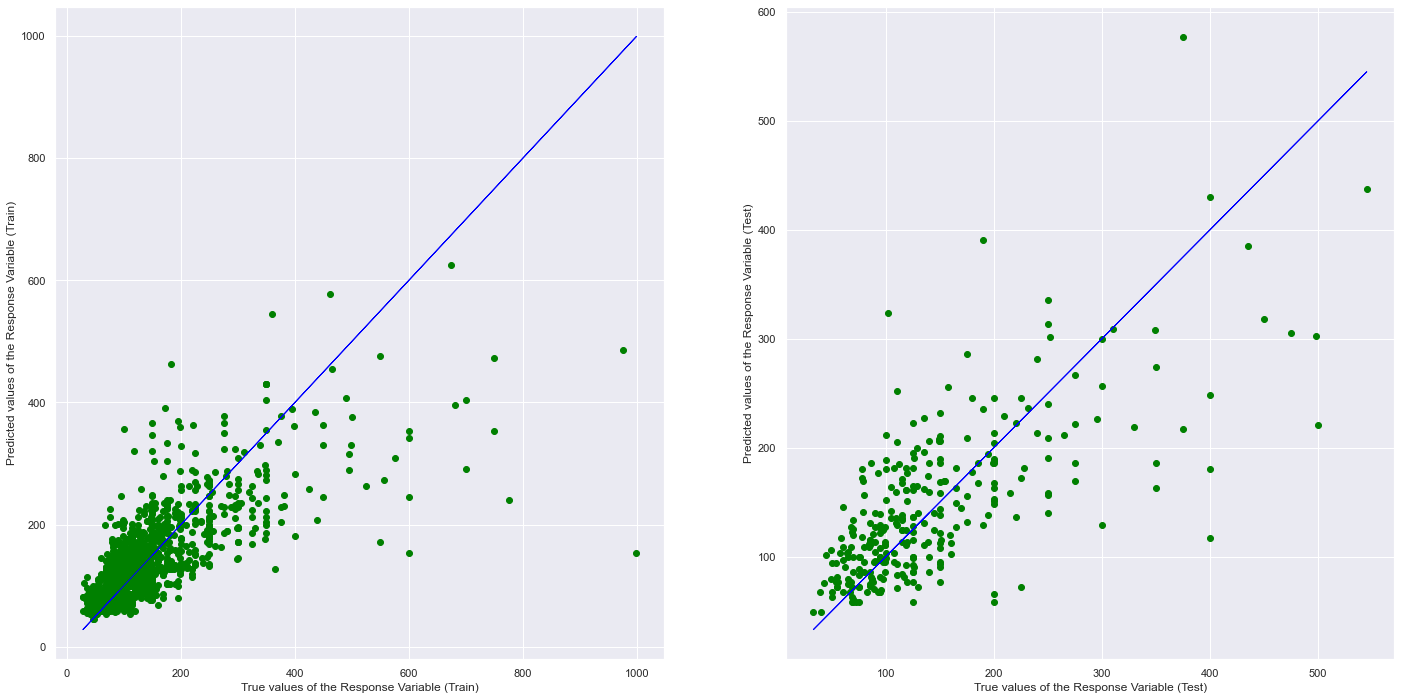

In [209]:
lassoresponse_a = airbnbvariables_a['price']
lassopredictor_a = airbnbvariables_a[['accommodates','cleaning_fee','security_deposit']]

lassoresponsetrain_a = lassoresponse_a[:1172]
lassoresponsetest_a = lassoresponse_a[-293:]
lassopredictortrain_a = pd.DataFrame(lassopredictor_a[:1172])
lassopredictortest_a = pd.DataFrame(lassopredictor_a[-293:])

cv_a = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lassomodel_a = LassoCV(cv=cv_a, n_jobs=-1)
lassomodel_a.fit(lassopredictortrain_a, lassoresponsetrain_a)

lassoresponsetrain_pred_a = lassomodel_a.predict(lassopredictortrain_a)
lassoresponsetest_pred_a = lassomodel_a.predict(lassopredictortest_a)

print("Lasso regression")

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lassomodel_a.score(lassopredictortrain_a, lassoresponsetrain_a))
print("Mean Squared Error (MSE) \t:", mean_squared_error(lassoresponsetrain_a, lassoresponsetrain_pred_a))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lassomodel_a.score(lassopredictortest_a, lassoresponsetest_a))
print("Mean Squared Error (MSE) \t:", mean_squared_error(lassoresponsetest_a, lassoresponsetest_pred_a))
print()

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(lassoresponsetrain_a, lassoresponsetrain_pred_a, color = "green")
axes[0].plot(lassoresponsetrain_a, lassoresponsetrain_a, color = "blue", linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(lassoresponsetest_a, lassoresponsetest_pred_a, color = "green")
axes[1].plot(lassoresponsetest_a, lassoresponsetest_a, color = "blue", linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

A random forest regression model builds a decision tree based on the data giving and takes the average of all the possible predictions to finally predict the response.

In [210]:
regressor_a=RandomForestRegressor(random_state = 3,max_depth = 10 )

regressorpredictor_a=airbnbvariables_a[['accommodates','number_of_reviews',
                                           'reviews_per_month',
                                        'security_deposit',
                                        'cleaning_fee','extra_people']]
regressorresponse_a=airbnbvariables_a['price']

regressorresponsetrain_a=regressorresponse_a[:1172]
regressorresponsetest_a=regressorresponse_a[-293:]
regressorpredictortrain_a=pd.DataFrame(regressorpredictor_a[:1172])
regressorpredictortest_a=pd.DataFrame(regressorpredictor_a[-293:])

regressor_a.fit(regressorpredictortrain_a, regressorresponsetrain_a)

RandomForestRegressor(max_depth=10, random_state=3)

In [211]:
regressorresponsetrain_pred_a = regressor_a.predict(regressorpredictortrain_a)
regressorresponsetest_pred_a = regressor_a.predict(regressorpredictortest_a)

Random Forest Regressor
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8959557780060154
Mean Squared Error (MSE) 	: 1155.4284344557243

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.44139828010488846
Mean Squared Error (MSE) 	: 4388.416676893225



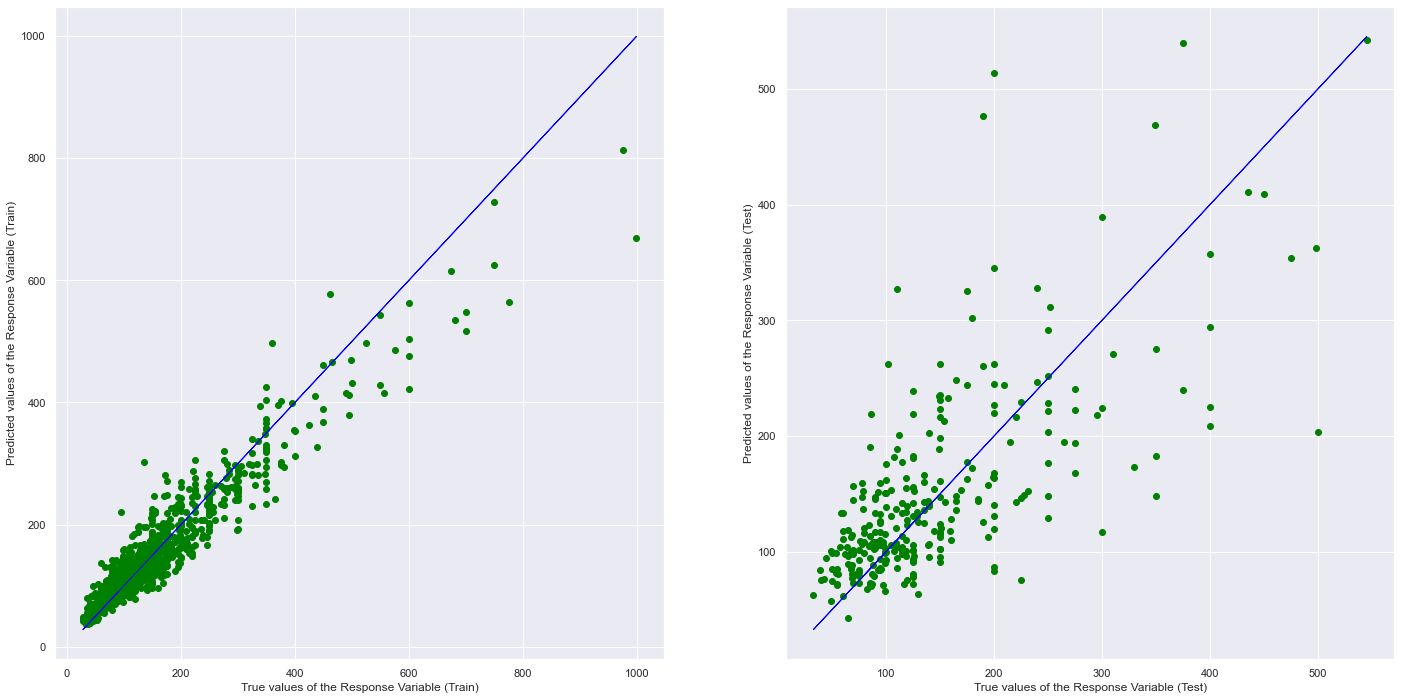

In [212]:
print("Random Forest Regressor")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor_a.score(regressorpredictortrain_a, regressorresponsetrain_a))
print("Mean Squared Error (MSE) \t:", mean_squared_error(regressorresponsetrain_a, regressorresponsetrain_pred_a))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor_a.score(regressorpredictortest_a, regressorresponsetest_a))
print("Mean Squared Error (MSE) \t:", mean_squared_error(regressorresponsetest_a, regressorresponsetest_pred_a))
print()

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(regressorresponsetrain_a, regressorresponsetrain_pred_a, color = "green")
axes[0].plot(regressorresponsetrain_a, regressorresponsetrain_a, color = "blue", linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(regressorresponsetest_a, regressorresponsetest_pred_a, color = "green")
axes[1].plot(regressorresponsetest_a, regressorresponsetest_a, color = "blue", linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

After fitting in the random forest generator model, it seems like a random tree regression model would be the most accurate as the explained variance for the train dataset is the highest amongst all the models at 0.895. However, that may not be the case as the explained variance for the test dataset is slightly lower as compared to the linear regressor model at 0.441 and 0.496 respectively.

# Sub problem 1: Do the price change depending on the time of year?

In [213]:
calendar_jk.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [214]:
#Rename NaN values with 0
calendar_jk.fillna(0, inplace = True)
calendar_jk = calendar_jk[calendar_jk.price != 0]

#Extracting prices from the table
price = calendar_jk['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','',str(p))
    prices.append(float(p))
    
#replace the price column with the new column
calendar_jk['price']= prices

In [215]:
#Convert from object to datetime64[ns]
calendar_jk['date'] = pd.to_datetime(calendar_jk['date'])

In [216]:
calendar_jk.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [217]:
calendar_jk = calendar_jk.set_index('date')

calendar_jk['Year'] = calendar_jk.index.year
calendar_jk['Month'] = calendar_jk.index.month
calendar_jk['Day'] = calendar_jk.index.day

calendar_jk.head()

,listing_id,available,price,Year,Month,Day
date,,,,,,
2016-01-04,241032,t,85.0,2016,1,4
2016-01-05,241032,t,85.0,2016,1,5
2016-01-13,241032,t,85.0,2016,1,13
2016-01-14,241032,t,85.0,2016,1,14
2016-01-18,241032,t,85.0,2016,1,18


In [218]:
#Split the data into Year and Month to analyse it
yearDF=calendar_jk.groupby(['Year','Month']).price.mean()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'price':'Average Price'})
yearDF.head()

,Year,Month,Average Price
0,2016,1,121.568409
1,2016,2,124.293927
2,2016,3,128.644488
3,2016,4,135.097005
4,2016,5,139.538183


We analyse the data to see whether prices are affected by seasonal changes in Seattle.

<AxesSubplot:xlabel='Month', ylabel='price'>

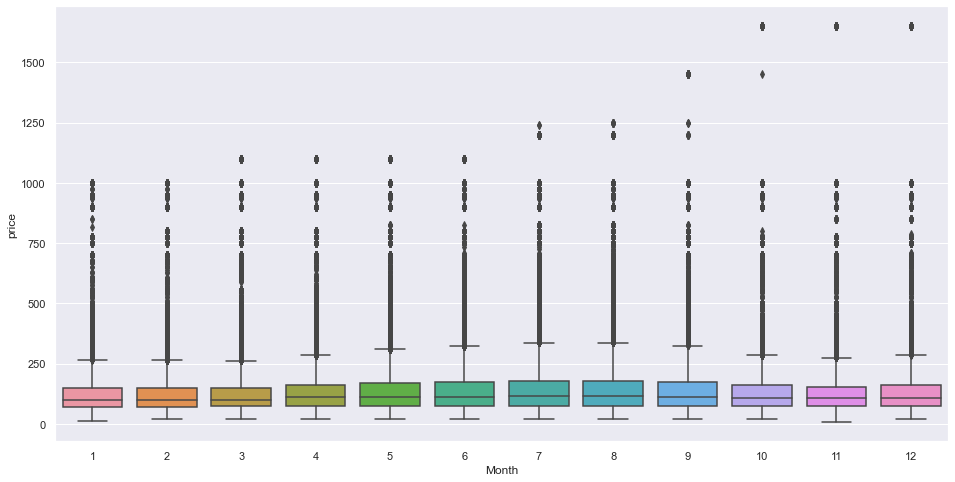

In [219]:
sb.set(rc={'figure.figsize':(20, 20)})

f, axes = plt.subplots(1, 1, figsize=(16,8))
sb.boxplot(x = 'Month', y='price', data=calendar_jk)

We can observe from the boxplot that the upper quartile of the season during Summer (June - August) is generally higher than the other seasons. Let us confirm the hypothesis by analysing the data with a line graph.

Spring: 1 Mar - 31 May 

Summer: 1 Jun - 31 Aug

Fall(Autumn): 1 Sep - 30 Nov

Winter: 1 Dec - 28 Feb

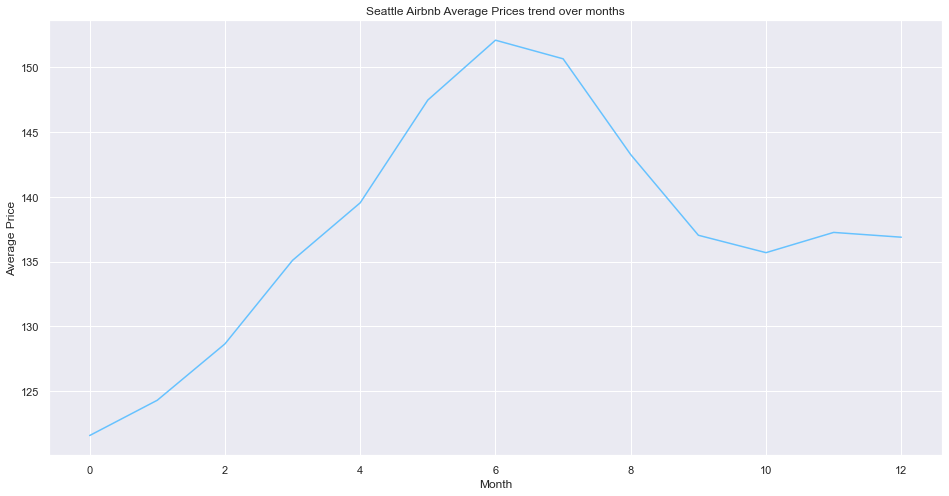

In [220]:
ax = yearDF['Average Price'].plot(x='Month',
           y='Average Price',
           color = '#66c2ff', 
           linewidth=1.5,
           figsize =(16,8), 
           title = 'Seattle Airbnb Average Prices trend over months', 
           legend = False)
ax.set_xlabel('Month');
ax.set_ylabel('Average Price');

With a glance, we can confirm that the Summer season has the highest average price in Seattle, followed by Autumn, Winter then Spring. This is presumably because of the concurrent Summer break which falls between May and August in the US, when families love to travel around. 

We can also observe that the peak of the graph occured during the month of July. We analyse the data further to figure out the cause of the spike in average price

In [221]:
holidays_jk = pd.read_csv('calendar.csv')

holidays_jk.fillna(0, inplace=True)
holidays_jk = holidays_jk[holidays_jk.price != 0]

price = holidays_jk['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','',str(p))
    prices.append(float(p))
    
holidays_jk['price']= prices

holidays_jk = holidays_jk[holidays_jk.price >= 0]

holidays_jk['Year'],holidays_jk['Month'],holidays_jk['Day']=holidays_jk['date'].str.split('-',2).str
holidays_jk.head()

us_holidays = holidays.UnitedStates()

holidays_jk['day_Name']='default'
holidays_jk['holiday']='False'
holidays_jk['us_holidays_name']='working'

for index,row in holidays_jk.iterrows():
    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
    holidays_jk.at[index,'day_Name'] = calendar.day_name[sdate.weekday()]
    holidays_jk.at[index,'holiday'] = vall
    holidays_jk.at[index,'us_holidays_name'] = us_holidays.get(sdate)
holidays_jk.to_csv('./holidays_data.csv')
holidays_jk.head()

,listing_id,date,available,price,Year,Month,Day,day_Name,holiday,us_holidays_name
0,241032,2016-01-04,t,85.0,2016,01,04,Monday,False,None
1,241032,2016-01-05,t,85.0,2016,01,05,Tuesday,False,None
9,241032,2016-01-13,t,85.0,2016,01,13,Wednesday,False,None
10,241032,2016-01-14,t,85.0,2016,01,14,Thursday,False,None
14,241032,2016-01-18,t,85.0,2016,01,18,Monday,True,Martin Luther King Jr. Day


Text(0.5, 0, 'Holiday Names')

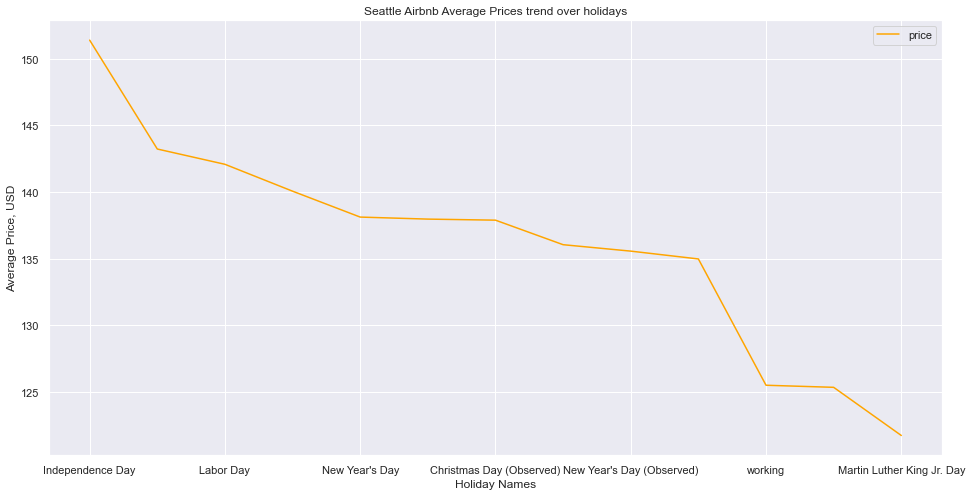

In [223]:
holidayPriceDF_jk=holidayPriceDF_jk.groupby('us_holidays_name').price.mean()
holidayPriceDF_jk=holidayPriceDF_jk.reset_index()
holidayPriceDF_jk=holidayPriceDF_jk.sort_values('price',ascending=[0])

holidayPriceDF_jk.plot(kind = 'line',
           x= 'us_holidays_name',
           y='price',
           color = '#FFA500', 
           figsize =(16,8), 
           title = 'Seattle Airbnb Average Prices trend over holidays', 
           legend = True)

plt.ylabel('Average Price, USD')
plt.xlabel('Holiday Names')

The above graph of average price against holidays concludes that independence day has the highest average price in Seattle, which explains why the month of July in the previous analysis was the peak for the average price in Seattle.

Now, we can further analyse the data to see whether certain days over the week has a higher average price.

In [225]:
#Categorising average prices of each day in a week

dayDF_jk=holidays_jk.groupby('day_Name').price.mean()
dayDF_jk=dayDF_jk.reset_index()
dayDF_jk['day_num']=0

for index,row in dayDF_jk.iterrows():
    if row['day_Name']=='Monday':
        dayDF_jk.at[index,'day_num']=1
    if row['day_Name']=='Tuesday':
        dayDF_jk.at[index,'day_num']=2
    if row['day_Name']=='Wednesday':
        dayDF_jk.at[index,'day_num']=3
    if row['day_Name']=='Thursday':
        dayDF_jk.at[index,'day_num']=4
    if row['day_Name']=='Friday':
        dayDF_jk.at[index,'day_num']=5
    if row['day_Name']=='Saturday':
        dayDF_jk.at[index,'day_num']=6
    if row['day_Name']=='Sunday':
        dayDF_jk.at[index,'day_num']=7

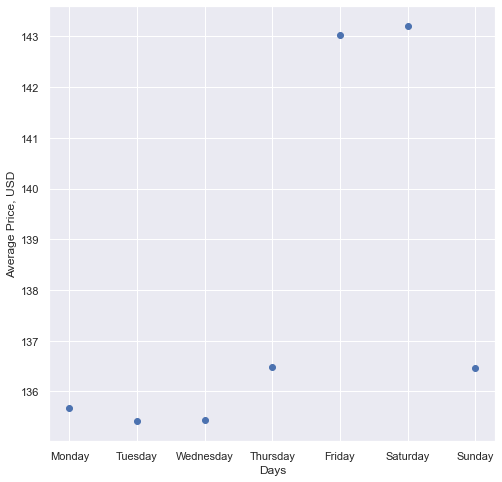

In [227]:
#visualising dayDF_jk to observe the trend

dayDF_jk=dayDF_jk.sort_values('day_num',ascending=[1])
dayDF_jk=dayDF_jk.rename(columns={'price':'Average_Price'})

dayname = list()
for i in dayDF_jk['day_Name']:
    dayname.append(i)
avgprice = list()
for i in dayDF_jk['Average_Price']:
    avgprice.append(i)
graph_input = dict(zip(dayname,avgprice))

plt.ylabel('Average Price, USD')
plt.xlabel('Days')

sb.set(rc={'figure.figsize':(8,8)})
plt.scatter(dayname,avgprice)
plt.show()

We can observe that prices are fairly high over the weekends (namely Friday & Saturday), when people are taking a break from work.

From the analysis in average prices, it can be concluded that one should avoid visiting Seattle during the weekends, the Summer season, particularly the month of July & August as the average price of listings are evidently higher.

# Sub problem 2: Which neighbourhood is the most costly and cheapest to stay?

In [228]:
listings_zy.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [229]:
listings_zy.shape

(3818, 92)

In [230]:
listings_zy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### Cleaning Data

In [231]:
# remove , sign
listings_zy["price"] = listings_zy["price"].str.replace(',', '')

# remove $ sign
for col in listings_zy:
    listings_zy["price"] = listings_zy["price"].map(lambda x: x.replace('$',''))
    
# make price as a float instead of an object
listings_zy['price'] = listings_zy['price'].astype('float')

In [232]:
# Checking data type
listings_zy["price"].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

In [234]:
neighbourhood_data_zy = pd.DataFrame(listings_zy[['neighbourhood']])
neighbourhood_data_zy.describe()

,neighbourhood
count,3402
unique,81
top,Capitol Hill
freq,351


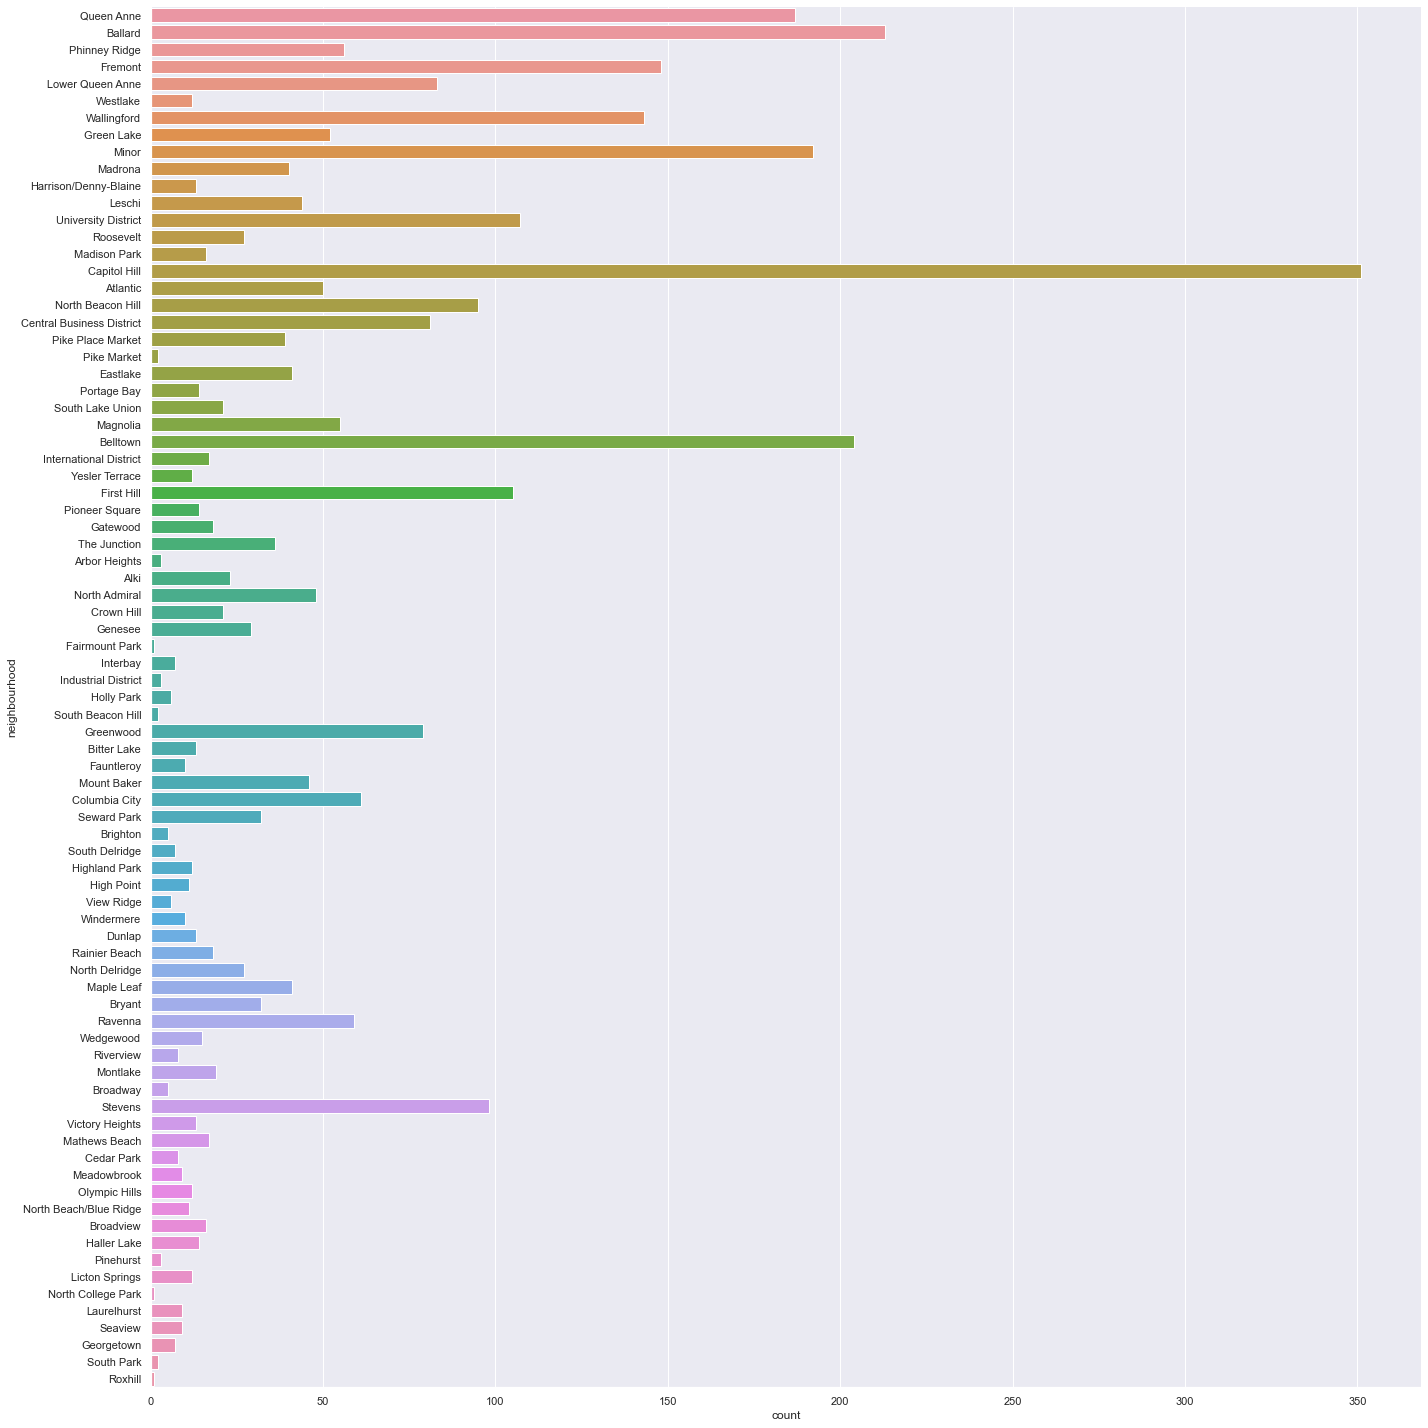

In [235]:
neigh_data_zy = pd.DataFrame(neighbourhood_data_zy[['neighbourhood']])
sb.catplot(y = 'neighbourhood', data = neigh_data_zy, kind = "count", height = 20)

In [236]:
specific_data_zy = pd.DataFrame(listings_zy[["neighbourhood","price", "latitude", "longitude"]])
specific_data_zy.head()

,neighbourhood,price,latitude,longitude
0,Queen Anne,85.0,47.636289,-122.371025
1,Queen Anne,150.0,47.639123,-122.365666
2,Queen Anne,975.0,47.629724,-122.369483
3,Queen Anne,100.0,47.638473,-122.369279
4,Queen Anne,450.0,47.632918,-122.372471


In [237]:
# Merge the data by taking the mean of price, latitude and longitude for each neighbourhood
group_data_zy = listings_zy.groupby("neighbourhood")["price","latitude","longitude"].mean()
grouped_datas_zy  = pd.DataFrame(group_data_zy)
grouped_datas_zy

,price,latitude,longitude
neighbourhood,,,
Alki,196.652174,47.571967,-122.408159
Arbor Heights,118.000000,47.510145,-122.381473
Atlantic,116.280000,47.594896,-122.304818
Ballard,123.615023,47.674617,-122.379902
Belltown,166.627451,47.615125,-122.345542
...,...,...,...
Wallingford,131.335664,47.659809,-122.333501
Wedgewood,106.666667,47.689881,-122.291056
Westlake,197.000000,47.631627,-122.342116


In [238]:
# Make neighbourhood a variable
required_datas_zy = grouped_datas_zy.reset_index()
required_datas_zy

,neighbourhood,price,latitude,longitude
0,Alki,196.652174,47.571967,-122.408159
1,Arbor Heights,118.000000,47.510145,-122.381473
2,Atlantic,116.280000,47.594896,-122.304818
3,Ballard,123.615023,47.674617,-122.379902
4,Belltown,166.627451,47.615125,-122.345542
...,...,...,...,...
76,Wallingford,131.335664,47.659809,-122.333501
77,Wedgewood,106.666667,47.689881,-122.291056
78,Westlake,197.000000,47.631627,-122.342116
79,Windermere,174.700000,47.670713,-122.271895


<AxesSubplot:>

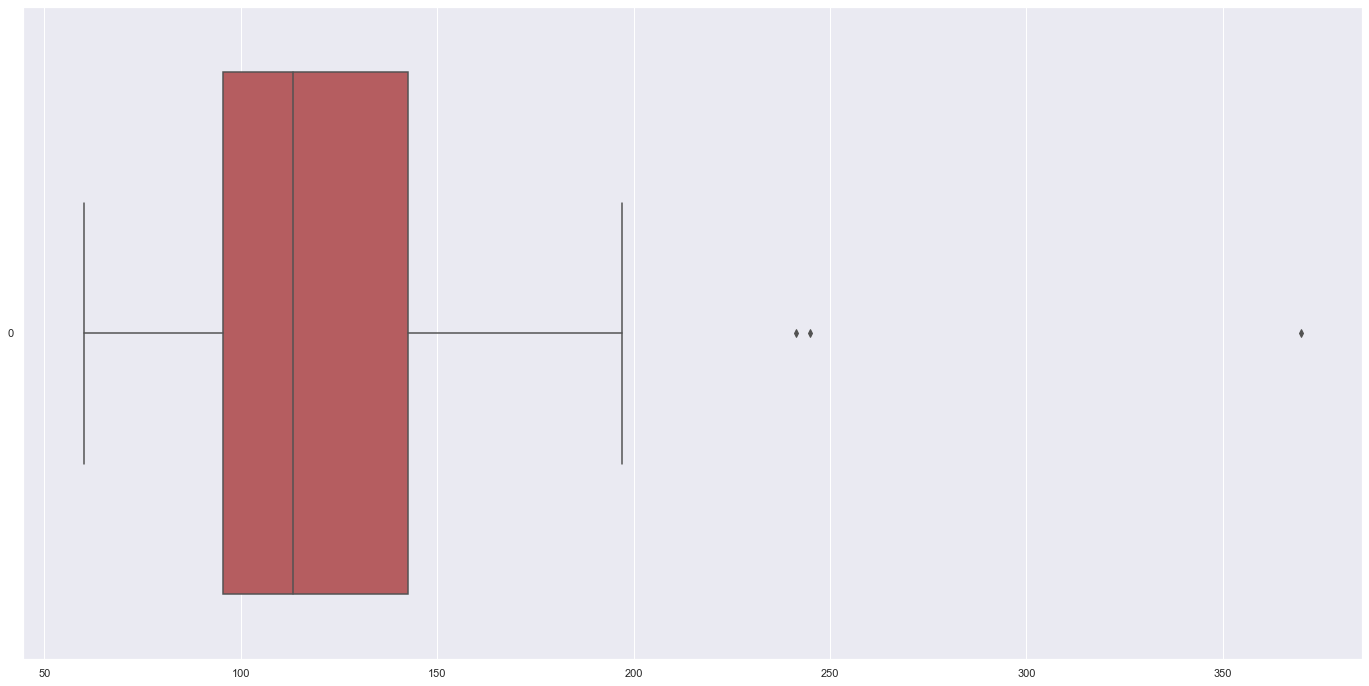

In [239]:
# Draw the distributions of prices
f = plt.figure(figsize=(24, 12))
sb.boxplot(data = required_datas_zy["price"], orient = "h", color = "r")

<AxesSubplot:xlabel='price', ylabel='Count'>

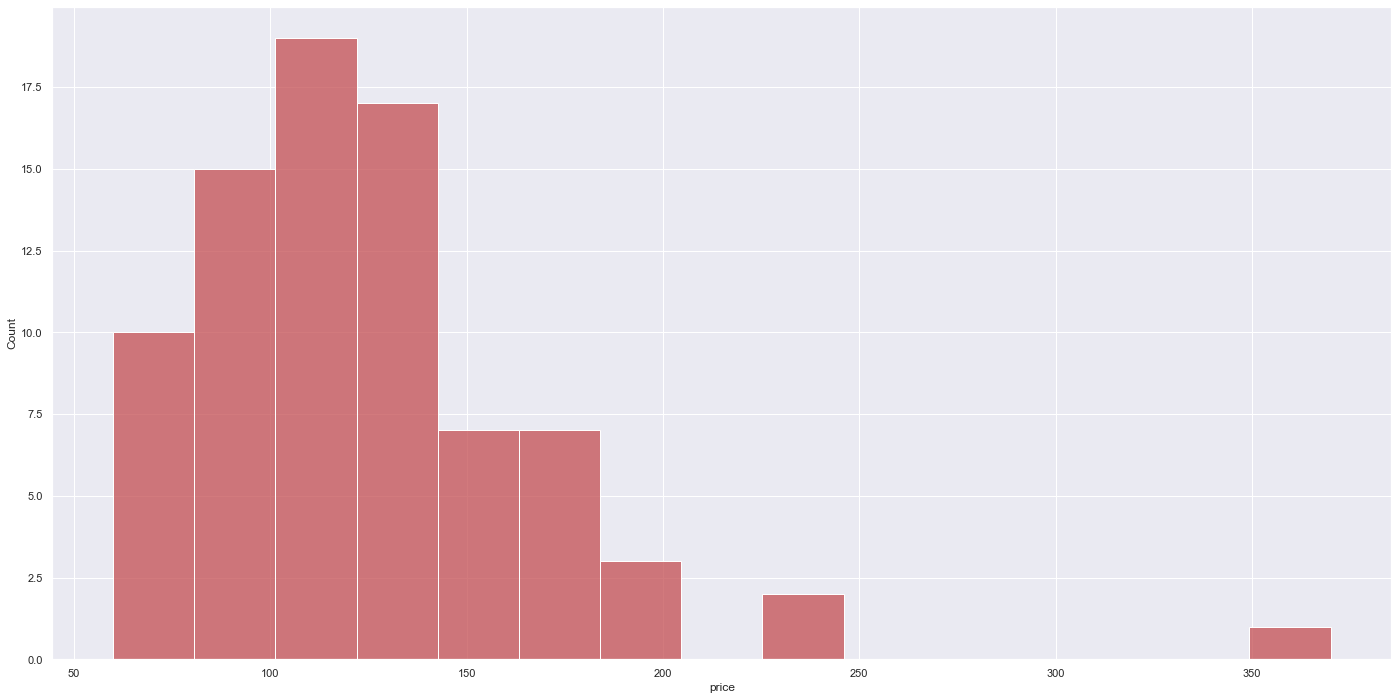

In [240]:
# Draw the distributions of all variables
f = plt.figure(figsize=(24, 12))
sb.histplot(data = required_datas_zy['price'], color = "r")

<AxesSubplot:>

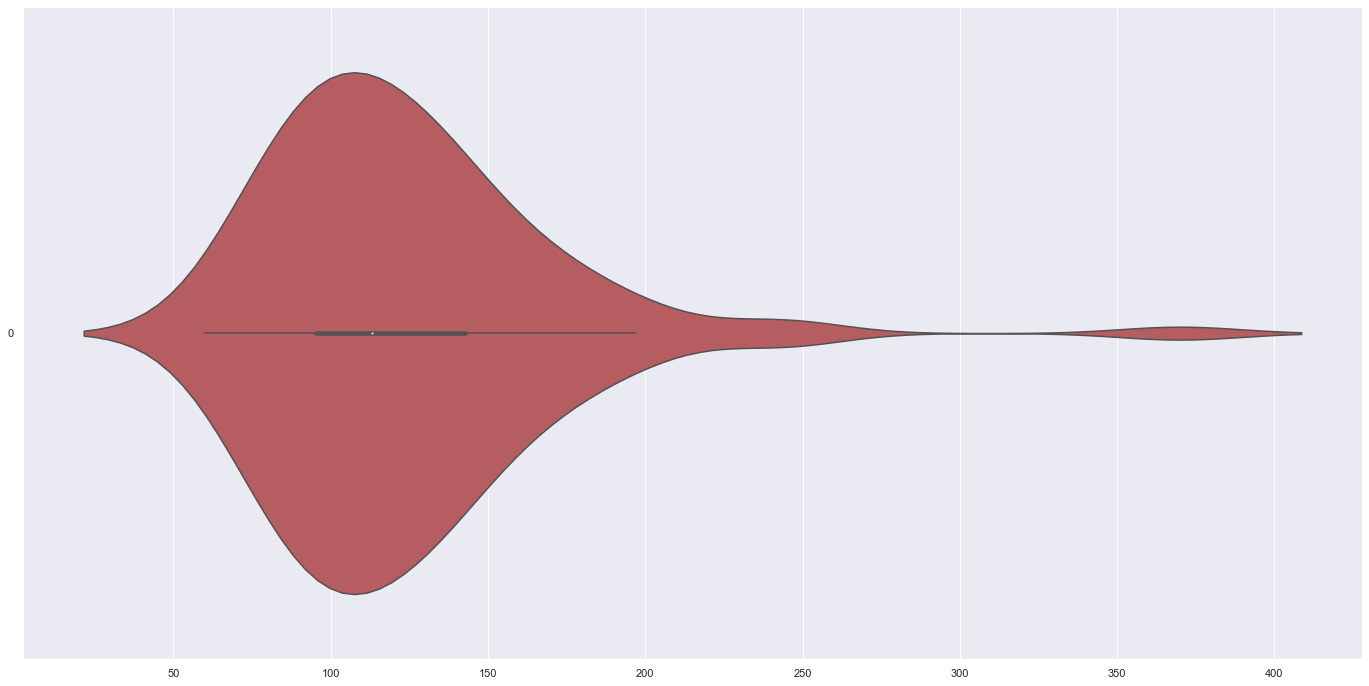

In [241]:
# Draw the distributions of all variables
f = plt.figure(figsize=(24, 12))

sb.violinplot(data = required_datas_zy['price'], orient = "h", color = "r")

In [242]:
# determining outliers
Q1 = required_datas_zy["price"].quantile(0.25)
Q3 = required_datas_zy["price"].quantile(0.75)
IQR = Q3 - Q1

outliers = ((required_datas_zy["price"] < (Q1 - 1.5 * IQR)) | (required_datas_zy["price"] > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers:", outliers)

Number of outliers: 3


In [243]:
# Sort the prices of neighbourhood from most expensive to least expensive
neigh_price_top_bar_zy = pd.DataFrame(grouped_datas_zy).sort_values('price', ascending=False)

# Sort the prices of neighbourhood from least expensive to most expensive
neigh_price_bot_bar_zy = pd.DataFrame(grouped_datas_zy).sort_values('price', ascending=True)

# Top 10 most expensive neighbourhood
top10_bar_zy = neigh_price_top_bar_zy["price"].head(10)
bot10_bar_zy = neigh_price_bot_bar_zy["price"].head(10)
top10_bar_zy

neighbourhood
Fairmount Park         370.000000
Industrial District    245.000000
Portage Bay            241.428571
Westlake               197.000000
Alki                   196.652174
Montlake               195.947368
Magnolia               176.000000
Pike Place Market      175.512821
Windermere             174.700000
Queen Anne             168.764706
Name: price, dtype: float64

In [244]:
bot10_bar_zy

neighbourhood
Roxhill          60.000000
Olympic Hills    63.666667
Dunlap           75.461538
Rainier Beach    76.722222
Georgetown       77.000000
Riverview        77.375000
Brighton         78.000000
Crown Hill       78.666667
Bitter Lake      78.846154
Holly Park       79.166667
Name: price, dtype: float64

<AxesSubplot:xlabel='neighbourhood'>

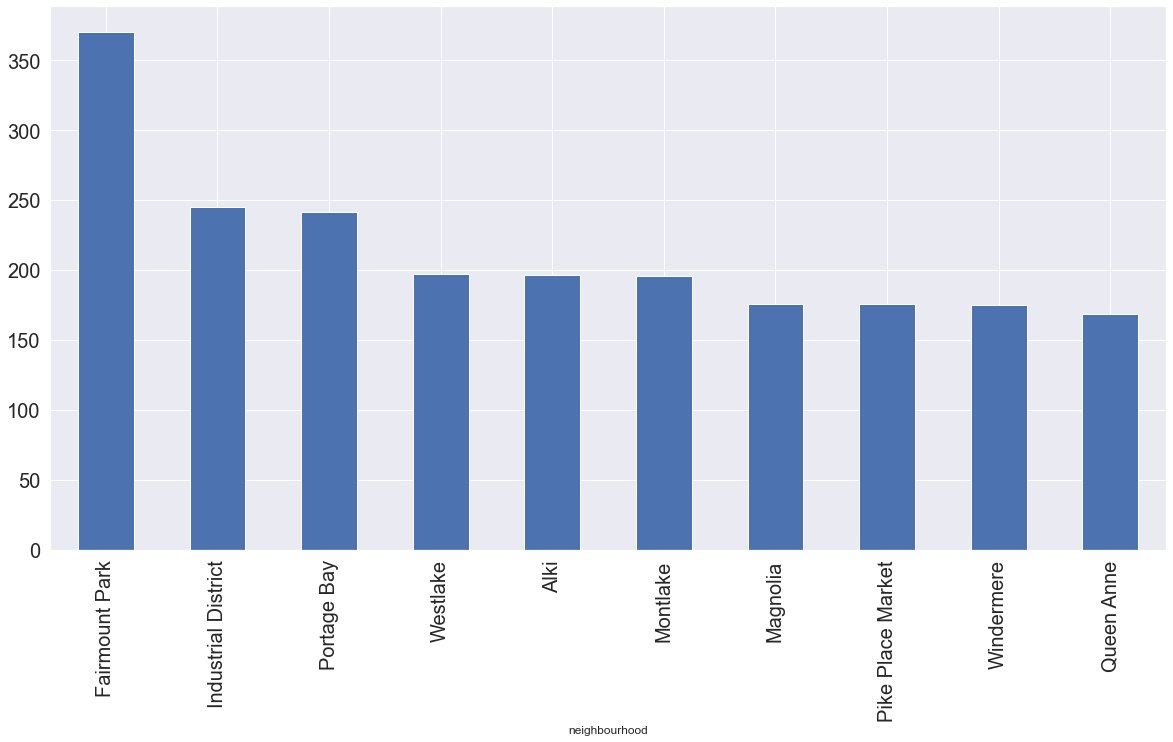

In [245]:
# Plotting bar graph for top 10 most expensive neighbourhood
top10_bar_zy.plot.bar(figsize=(20,10),fontsize = 20,color="b", )

Most exp neighbourhood is Fairmount Park

<AxesSubplot:xlabel='neighbourhood'>

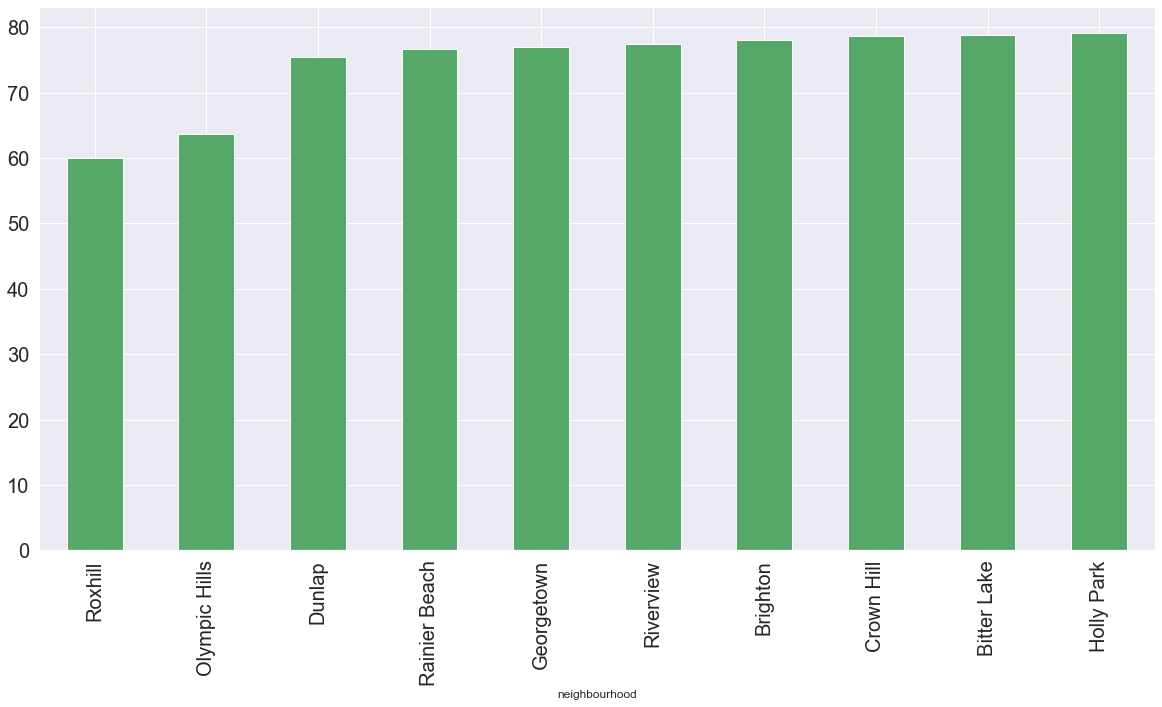

In [246]:
# Plotting bar graph for top 10 least expensive neighbourhood
bot10_bar_zy.plot.bar(figsize=(20,10),fontsize = 20,color="g", )

Least expensive neighbourhood is Roxhill

In [247]:
# Sort the prices of neighbourhood from most expensive to least expensive
neigh_price_top_zy = pd.DataFrame(required_datas_zy).sort_values('price', ascending=False)

# Sort the prices of neighbourhood from least expensive to most expensive
neigh_price_bot_zy = pd.DataFrame(required_datas_zy).sort_values('price', ascending=True)

# Top 10 most expensive neighbourhood
top10_zy = neigh_price_top_zy["price"].head(10)
print(top10_zy)

17    370.000000
31    245.000000
58    241.428571
78    197.000000
0     196.652174
45    195.947368
40    176.000000
55    175.512821
79    174.700000
59    168.764706
Name: price, dtype: float64


In [248]:
# Top 10 least expensive neighbourhood
bot10_zy = neigh_price_bot_zy["price"].head(10)
print(bot10_zy)

64    60.000000
52    63.666667
15    75.461538
60    76.722222
23    77.000000
62    77.375000
6     78.000000
14    78.666667
5     78.846154
30    79.166667
Name: price, dtype: float64


In [249]:
# Showing Seattle on the map
topmap_zy = folium.Map([47.6062, -122.3321], zoom_start=10)
botmap_zy = folium.Map([47.6062, -122.3321], zoom_start=11)

In [250]:
top10_loc_zy = neigh_price_top_zy.head(10)
top10_loc_zy

,neighbourhood,price,latitude,longitude
17,Fairmount Park,370.000000,47.550024,-122.381231
31,Industrial District,245.000000,47.578095,-122.322707
58,Portage Bay,241.428571,47.648038,-122.320575
78,Westlake,197.000000,47.631627,-122.342116
0,Alki,196.652174,47.571967,-122.408159
45,Montlake,195.947368,47.638424,-122.310812
40,Magnolia,176.000000,47.648660,-122.395953
55,Pike Place Market,175.512821,47.609306,-122.340744
79,Windermere,174.700000,47.670713,-122.271895
59,Queen Anne,168.764706,47.638069,-122.358780


In [251]:
bot10_loc_zy = neigh_price_bot_zy.head(10)
bot10_loc_zy

,neighbourhood,price,latitude,longitude
64,Roxhill,60.000000,47.528169,-122.376347
52,Olympic Hills,63.666667,47.726167,-122.302964
15,Dunlap,75.461538,47.527586,-122.274664
60,Rainier Beach,76.722222,47.515566,-122.262581
23,Georgetown,77.000000,47.547527,-122.319477
62,Riverview,77.375000,47.543262,-122.356807
6,Brighton,78.000000,47.539153,-122.278180
14,Crown Hill,78.666667,47.697374,-122.371983
5,Bitter Lake,78.846154,47.715759,-122.352205
30,Holly Park,79.166667,47.538972,-122.287935


In [252]:
# Map of higher houses price locations
for index, row in top10_loc_zy.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup=row["neighbourhood"]).add_to(topmap_zy)

# plot the locations
topmap_zy

In [253]:
# Map of higher houses price locations
for index, row in bot10_loc_zy.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup=row["neighbourhood"]).add_to(botmap_zy)

# plot the locations
botmap_zy